# **Import packages and other reqs**

In [0]:
import keras.datasets as ds
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D, ReLU, Flatten, Dense, Dropout
import keras
import numpy as np
import pandas as pd
from keras.models import load_model
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# **Build Model**

**Load MNIST data**

In [0]:
image_index = 101
input_shape = (28,28,1)
num_classes = 10
epochs = 5
batch_size = 64

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
2


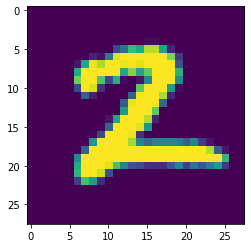

In [0]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


print(y_train[image_index])
plt.imshow(x_train[image_index])
#plt.imshow(x_train[image_index], cmap = 'Greys')
plt.show()

In [0]:
# y values before one hot encoding to visualize later
y_train_data = y_train
y_test_data = y_test

**Reshaping input images**

We need to reshape the data into 4 dimensional array for Keras API.
(a,b,c,d): a - number of images, (b,c) - size of the image, d - depth of the image. d=1 for greyscale, d=3 for RGB, etc.

In [0]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print(x_train.shape, x_test.shape)

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)
print(x_test[image_index].shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(28, 28, 1)


**Normalizing the input pixels**

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [0]:
#reshaped x values to visualize later
x_train_data = x_train.reshape(x_train.shape[0], x_train.shape[1],x_train.shape[2],1 )
x_test_data = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)

**Building CNN**

In [0]:
model = Sequential(name = 'MNIST')

model.add(Conv2D(16, (3,3), input_shape = input_shape, activation= 'relu', name = 'Block1_Conv'))
model.add(MaxPooling2D((2,2), name= 'Block1_MaxPool'))

model.add(Conv2D(32, (3,3), activation= 'relu', name = 'Block2_Conv'))
model.add(MaxPooling2D((2,2), name = 'Block2_MaxPool'))

model.add(Flatten(name = 'Layer1_Flattened_Input')) #input layer
model.add(Dense(32, activation= 'relu', name = 'Layer2_Hidden')) #hidden layer
model.add(Dense(num_classes, activation= 'softmax', name = 'Layer3_Output')) #output layer

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model.fit(x = x_train, y = y_train, epochs = epochs)

model.evaluate(x = x_test, y = y_test, batch_size = batch_size)


Save the Model to load later

In [0]:
model.save('/gdrive/My Drive/CIS_508/Colab Notebooks/WinterBreak/mnist_model.h5')

**Test the model**

In [0]:
model = load_model('/gdrive/My Drive/CIS_508/Colab Notebooks/WinterBreak/mnist_model.h5')

array([[9.9986935e-01, 3.1092808e-14, 2.2635400e-11, 7.8041317e-13,
        5.4563958e-14, 1.2076233e-09, 1.2641039e-04, 2.2773112e-11,
        2.0990990e-10, 4.2197835e-06]], dtype=float32)

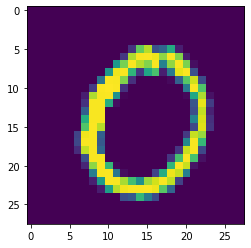

In [0]:
#x_test[image_index].shape  #(28,28,1) is of invalid shape. so reshape it back to (28,28) to plot the image
plt.imshow(x_test[image_index].reshape(28,28))

pred = model.predict_classes(x_test[image_index].reshape(1,28,28,1))
pred
prob = model.predict_proba(x_test[image_index].reshape(1,28,28,1))
prob

# **Model Visualization**

### Model Summary

Model: "MNIST"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Block1_Conv (Conv2D)         (None, 26, 26, 16)        160       
_________________________________________________________________
Block1_MaxPool (MaxPooling2D (None, 13, 13, 16)        0         
_________________________________________________________________
Block2_Conv (Conv2D)         (None, 11, 11, 32)        4640      
_________________________________________________________________
Block2_MaxPool (MaxPooling2D (None, 5, 5, 32)          0         
_________________________________________________________________
Layer1_Flattened_Input (Flat (None, 800)               0         
_________________________________________________________________
Layer2_Hidden (Dense)        (None, 32)                25632     
_________________________________________________________________
Layer3_Output (Dense)        (None, 10)                330   

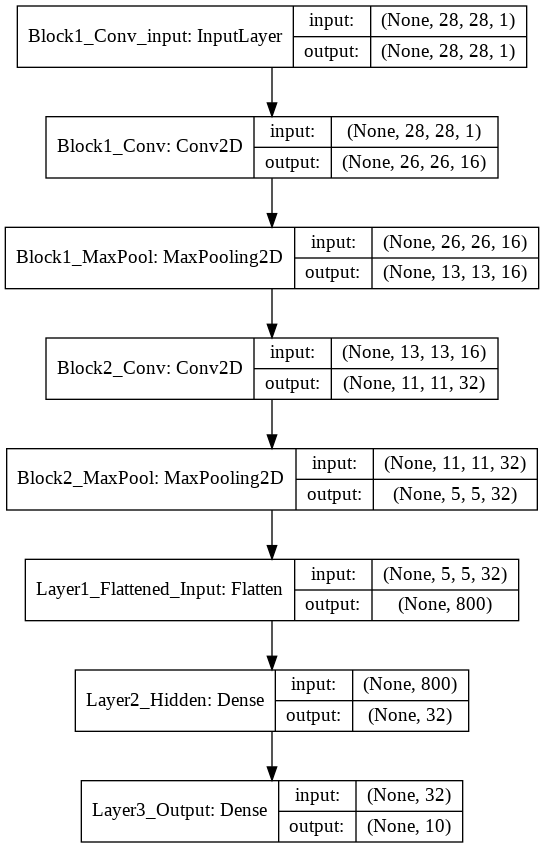

In [0]:
model = load_model('/gdrive/My Drive/CIS_508/Colab Notebooks/WinterBreak/mnist_model.h5')
#model.get_config()
model.summary()
keras.utils.plot_model(model, show_layer_names=True, show_shapes=True)
#model.get_weights()

### Visualizing CNN Filters

In [0]:
def get_conv_filters():
  filters = []
  print("Convolution Layers and Filters")
  for layer in model.layers:
    if ('Conv' in layer.name):
      filter, bias = layer.get_weights()
      fmin, fmax = filter.min(), filter.max()
      filter = (filter - fmin)/(fmax - fmin)
      (a,b,c,d) = filter.shape
      filter = filter.reshape(c,a,b,d)
      print(layer.name, filter.shape)
      filters.append(filter)
  return filters

In [0]:
def plot_filters(filters, conv_layer_num):
  conv_layer_num = conv_layer_num-1
  filter = filters[conv_layer_num]
  (a,b,c,d) = filter.shape
  filter= filter[0,:b,:c,:d].reshape(1,b,c,d)  #printing the first featuremap only, reshaping into 4d and sending to plot_images
  plot_images(filter, name = "Filter")
  return

Convolution Layers and Filters
Block1_Conv (1, 3, 3, 16)
Block2_Conv (16, 3, 3, 32)


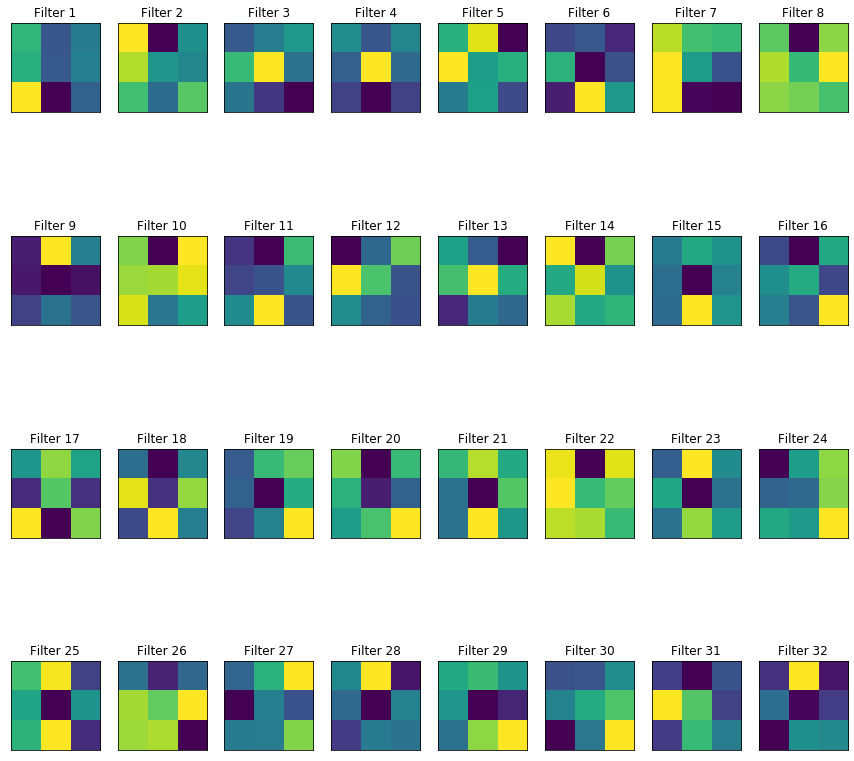

In [0]:
conv_layer = 2 #enter 1 or 2. Bcz the model has only 2 conv layers
filters = get_conv_filters()
plot_filters(filters = filters, conv_layer_num= conv_layer)

### Visualzing intermediate activations

Enter an image input and a layer number that you want to visualize.

In [0]:
def get_act(layer_num, input):
  #get activations at layer_num for the input. Input should be a 4d array (a,b,c,d). For just one input image a=1. (b,c) image sizes. d=1
  #returns two arrays neurons, values for layers 5,6,7 and feature maps values for layers 1 to 4
  layer_outputs = [layer.output for layer in model.layers]
  activation_model = Model(inputs=model.input, outputs = layer_outputs[layer_num-1])
  activations = activation_model.predict(input)
  if (layer_num >= 5):
    values = activations.T
    neurons = np.array(range(values.shape[0]))
    #plt.plot(neurons,values)
    plot_lines(neurons, values)
    return values
  else:
    values = activations
    plot_images(values, name = "Feature map") 
    return values

In [0]:
def plot_images(all_values, name = " "):
  #plotting all images in a grid of 8 columns and n rows
  #values is a 4d array with a for number of inputs, (b,c) for image size of feature maps and d for the number of feature maps
  num_inputs = all_values.shape[0]
  feature_maps = all_values.shape[-1]
  nrows = int(feature_maps/8)
  ncols = int(feature_maps/nrows)
  for values in all_values:
    i = 0  #re-initialize the featuremap count to 0 for the next input
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15,15), subplot_kw={'xticks':[], 'yticks':[]})
    for j in range(nrows):  #number of rows 
      for k in range(ncols): #number of columns
        ax[j][k].imshow(values[:,:,i]) 
        ax[j][k].set_title(name + " " + str(i+1))
        i = i+1
    plt.show()
    plt.close()

In [0]:
def plot_lines(neurons,values):
  fig, ax = plt.subplots(figsize = (20,5))
  ax.plot(neurons, values)
  ax.set(xlabel = 'Neurons', ylabel = 'Activation values', xlim = [neurons[0], neurons[-1]])
  ax.grid(axis = 'both')
  ax.set_xticks(neurons)
  return

In [0]:
def extract_digit_data(x_data, y_data):
  index = {}
  x = {}
  y = {}
  for digit in range(10):
    index[digit] = [indx for indx in range(len(y_data)) if y_data[indx]== digit]
    x[digit] = np.array([x_data[indx] for indx in index[digit]])
    y[digit] = np.array([y_data[indx] for indx in index[digit]])
  return index,x,y

In [0]:
def call_act(layer_num, digit, num_input_images):
  layer_num = layer_num
  digit = digit
  num_input_images = num_input_images
  start_from = 200  #of all digits you need not always go for the first ones in the array
  input = x[digit][start_from:start_from+num_input_images]
  values = get_act(layer_num, input)
  return values

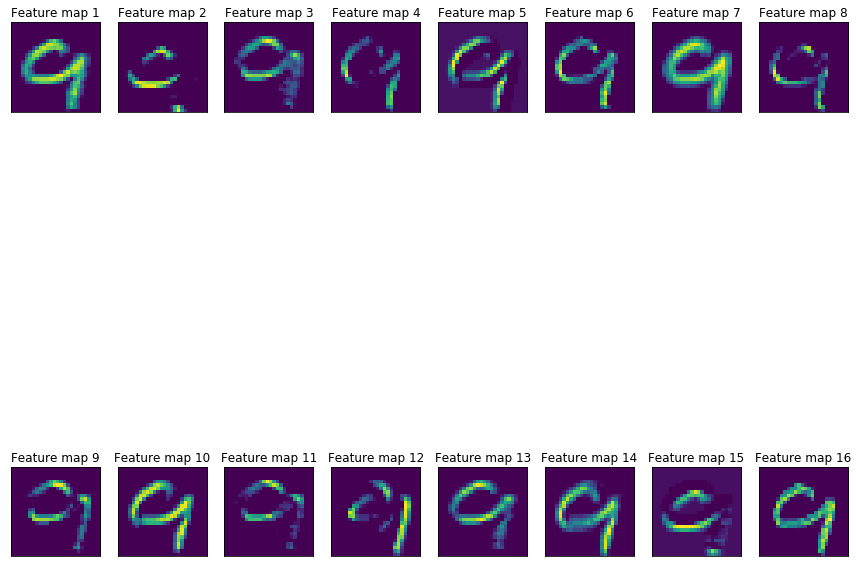

In [0]:
#for layers 5,6,7 values is a 2d array with (a,b) a=number of neurons in the layer and b=number of input images
index, x, y = extract_digit_data(x_test_data, y_test_data)
#values1 = call_act(layer_num = 1, digit = 4, num_input_images = 2)
values2 = call_act(layer_num = 1, digit = 9, num_input_images = 1)


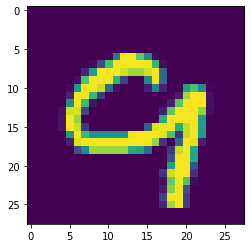

In [0]:
plt.imshow(x[9][70].reshape(28,28))

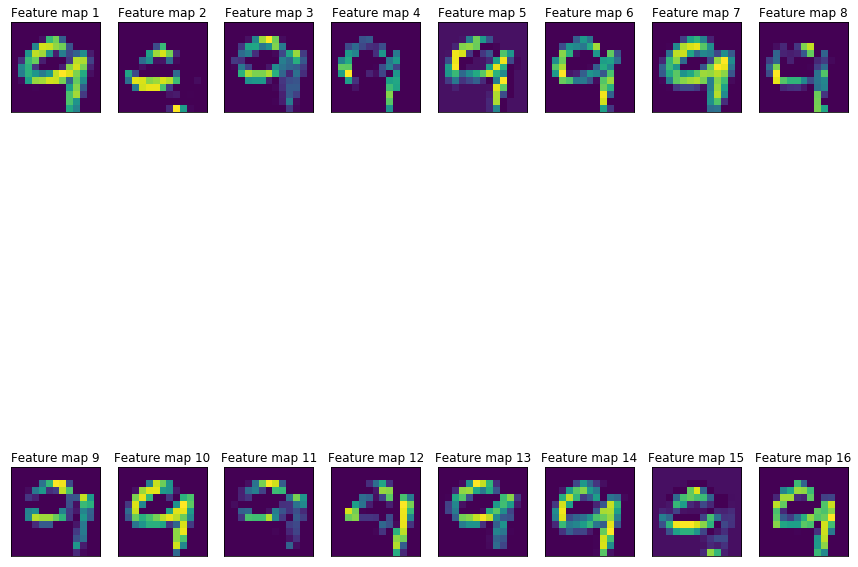

In [0]:
#values3 = call_act(layer_num = 2, digit = 4, num_input_images = 2)
values4 = call_act(layer_num = 2, digit = 9, num_input_images = 1)

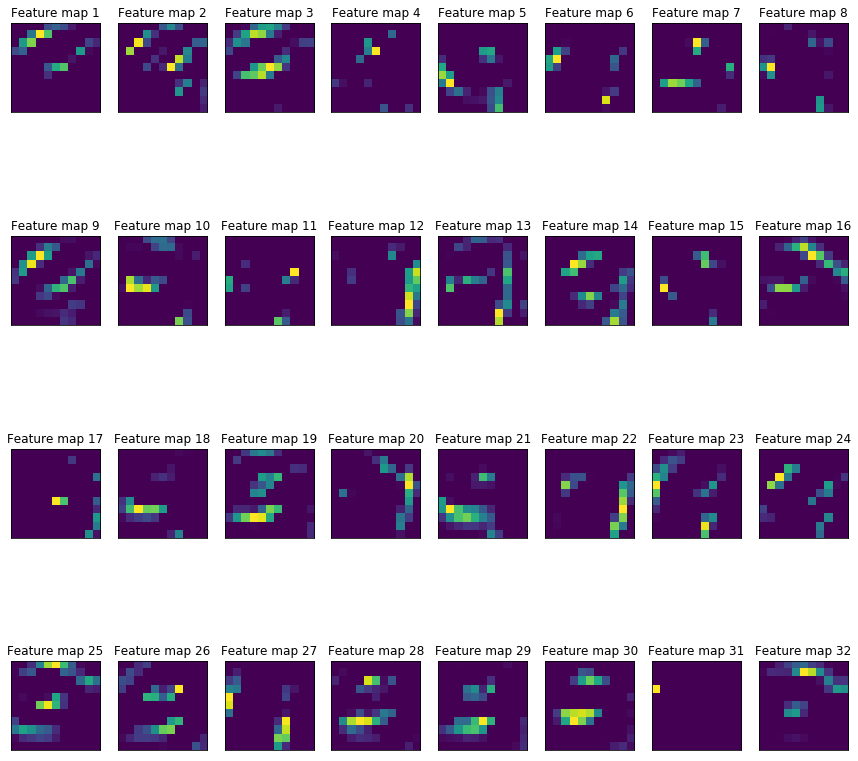

In [0]:
#values5 = call_act(layer_num = 3, digit = 4, num_input_images = 2)
values6 = call_act(layer_num = 3, digit = 9, num_input_images = 1)

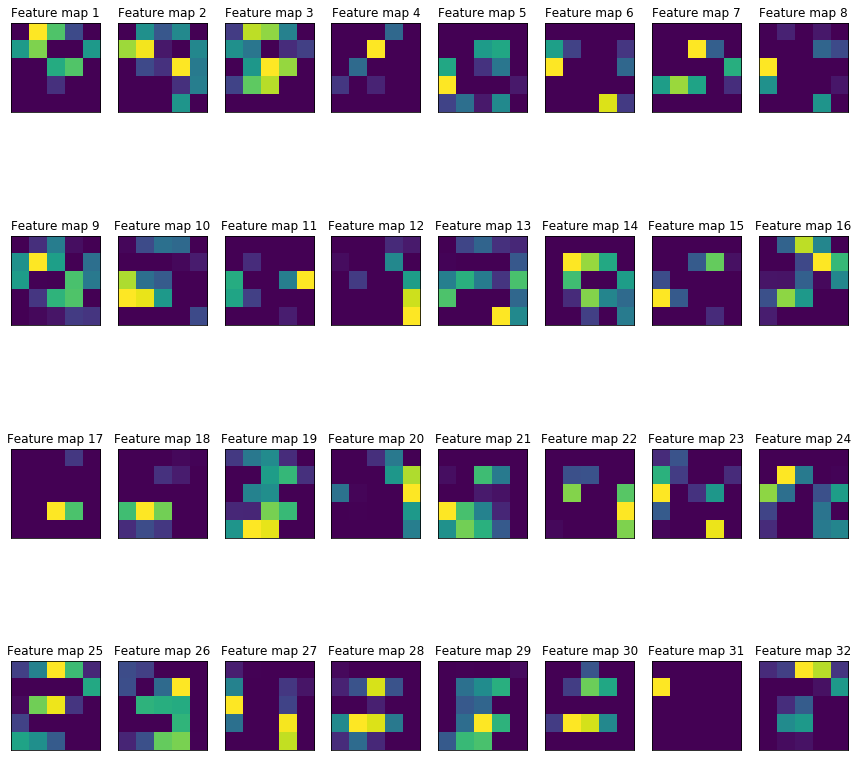

In [0]:
#values7 = call_act(layer_num = 4, digit = 4, num_input_images = 2)
values8 = call_act(layer_num = 4, digit = 9, num_input_images = 1)

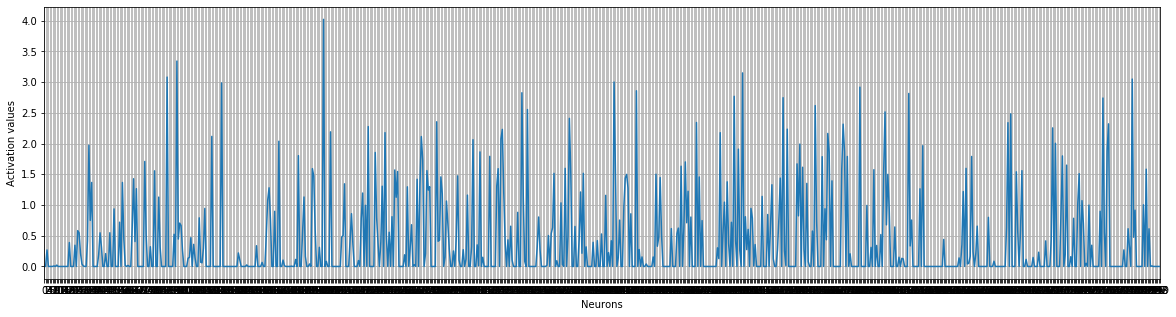

In [0]:
#values9 = call_act(layer_num = 5, digit = 4, num_input_images = 2)
values10 = call_act(layer_num = 5, digit = 9, num_input_images = 1)

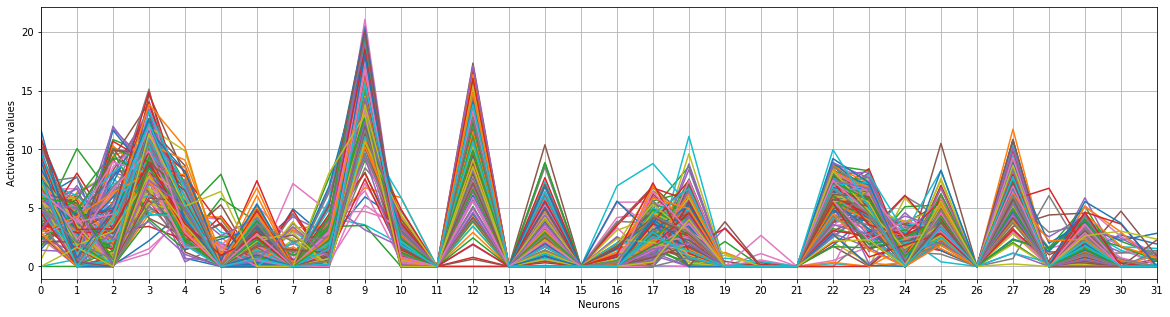

In [0]:
#values11 = call_act(layer_num = 6, digit = 4, num_input_images = 30)
values12 = call_act(layer_num = 6, digit = 9, num_input_images = 200)

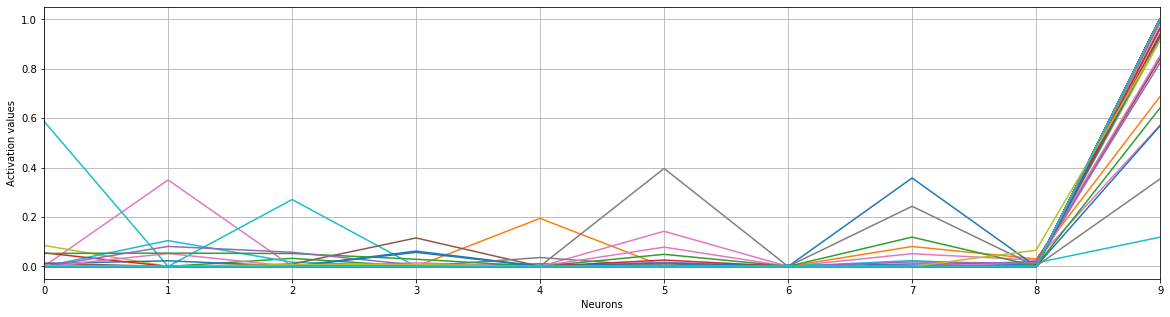

In [0]:
#values13 = call_act(layer_num = 7, digit = 4, num_input_images = 30)
values14 = call_act(layer_num = 7, digit = 9, num_input_images = 200)

Visualize Model Weights

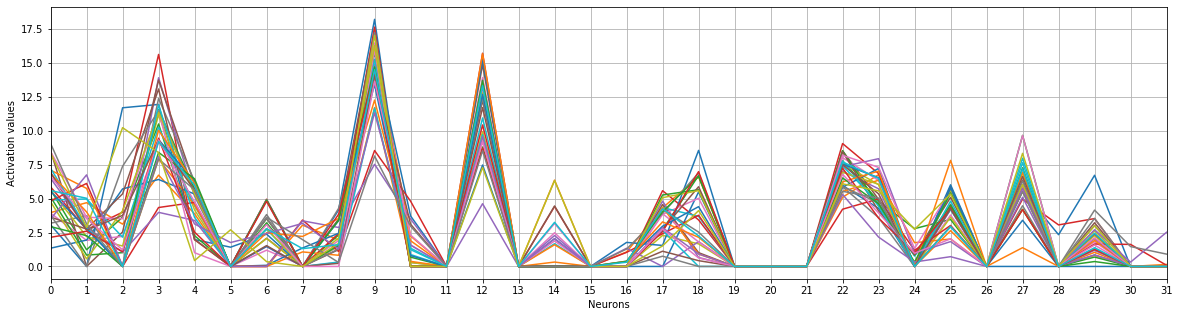

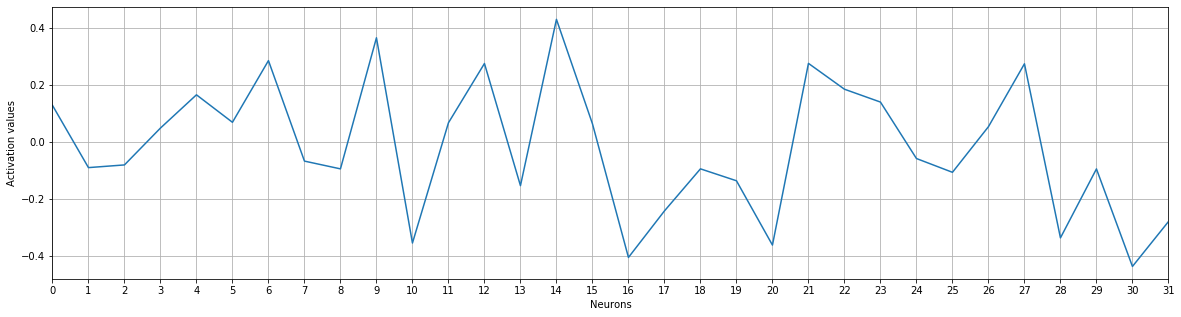

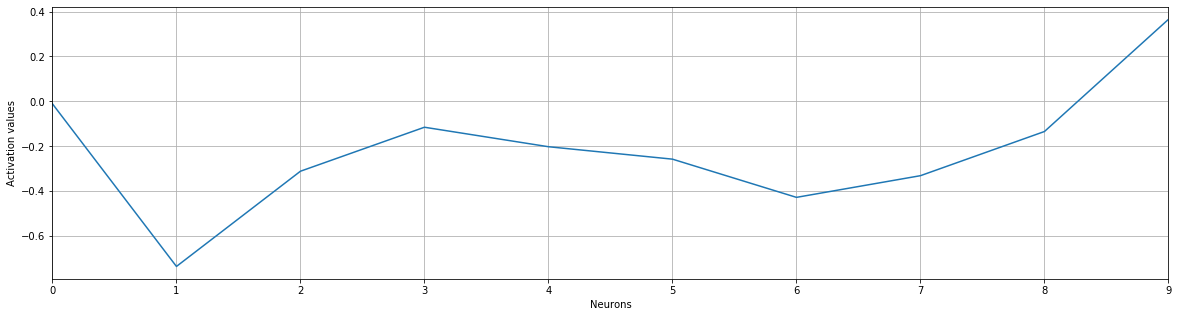

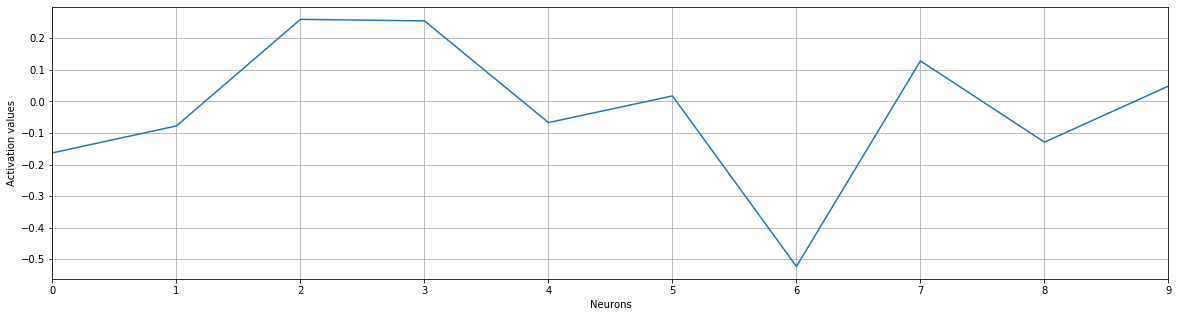

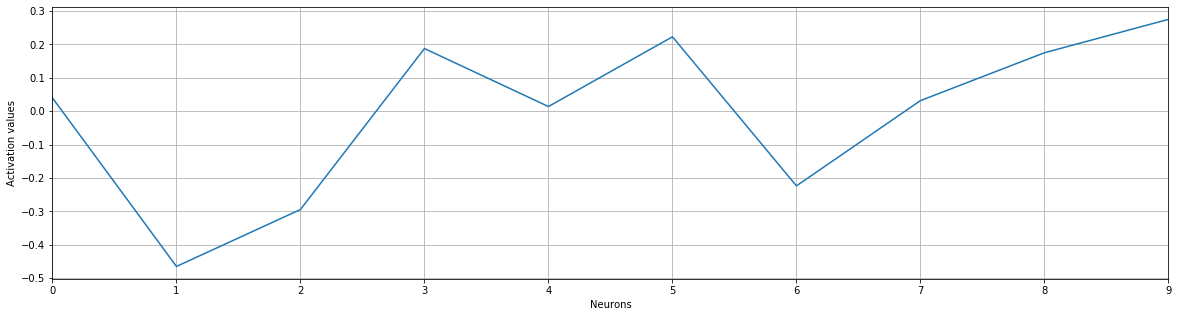

In [0]:
values12 = call_act(layer_num = 6, digit = 9, num_input_images = 30)

weights = model.get_weights()
type(weights)
layer6_weights = weights[6]
digit_weights = layer6_weights[:,9]    #digit 9
neurons = np.array(range(32))
plot_lines(neurons, digit_weights)

digits = np.array(range(10))
neuron28_weights = layer6_weights[9,:]   #neuron 9
plot_lines(digits, neuron28_weights)

digits = np.array(range(10))
neuron28_weights = layer6_weights[3,:]     #neuron 3
plot_lines(digits, neuron28_weights)

digits = np.array(range(10))
neuron28_weights = layer6_weights[12,:]     #neuron 12
plot_lines(digits, neuron28_weights)